In [1]:
# -*- coding: utf-8 -*-
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scapy import *
from sources import *
import seaborn as sns
from collections import OrderedDict
from __future__ import unicode_literals


sns.set(style="whitegrid")

# Modelado y Analisis de la Fuente S2

## < who has/is at , dst>

In [32]:
def plot_info_S2(fuente):

    informacion = OrderedDict(sorted(informacion_por_simbolo(fuente).items(), key=lambda x: x[1]))
    index, values = map(list, zip(*informacion.items()))
    entropia_S2 = entropy(fuente)
    entropia_maxima_S2 = max_entropy(fuente)
    
    fig, ax = plt.subplots(figsize=(13,5))
    bar_size = max(10.0/len(index), 0.2)
    
    range_whoHas = []
    range_isAt = []
    values_whoHas = []
    values_isAt  = []
    for i in range(len(index)):
        if index[i][0]=='w':
            # es who has
            range_whoHas.append(i)
            values_whoHas.append(values[i])
        else:
            # es isAt
            range_isAt.append(i)
            values_isAt.append(values[i])

    ax.bar(range_whoHas, values_whoHas, bar_size, color='b',label='who-has')
    if len(range_isAt) > 0:
        ax.bar(range_isAt, values_isAt, bar_size, color='r',label='is-at')
    ax.plot(range(len(index)), [entropia_S2]*len(index), color='k', label='Entropía de fuente')
    ax.plot(range(len(index)), [entropia_maxima_S2]*len(index), color='g', label='Entropía máxima')
    
    ax.set_ylabel('Cantidad de información [bits]',fontsize=12)
    #ax.set_xlabel('Símbolos por orden de información, '+str(len(index))+' en total',labelpad=10,fontsize=12)
    ax.legend(loc=(0.05,0.7),frameon=True,fontsize=12)

    xlabelsloc = [x for x in range(0,len(index),len(index)/10)]
    xlabels = ['$s_{'+str(x)+'}$' for x in xlabelsloc]
    plt.xticks(xlabelsloc,xlabels,fontsize=15)
    fig.tight_layout()




In [23]:
# Create sources

# Load pcaps
paths = []
paths += ['../data/buenos/captures_juab.pcap']
paths += ['../data/buenos/starbucks_juramento_monitor3_ARP.pcap']
paths += ['../data/buenos/ethernet_capture.pcap']
paths += ['../data/buenos/wired_lan.pcap']

# Create sources
S2_attrs = ['op','pdst']

S2_list = []
for path in paths:
    packets = sniff(offline=path)
    S2 = create_ARP_source(packets, S2_attrs) 
    S2_list.append(S2)
    

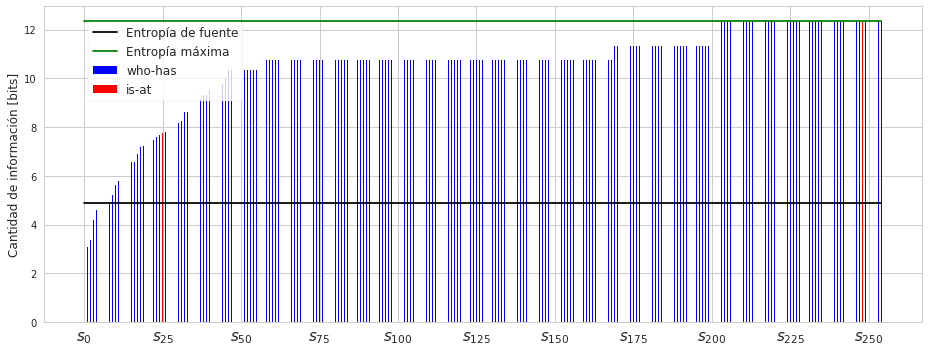

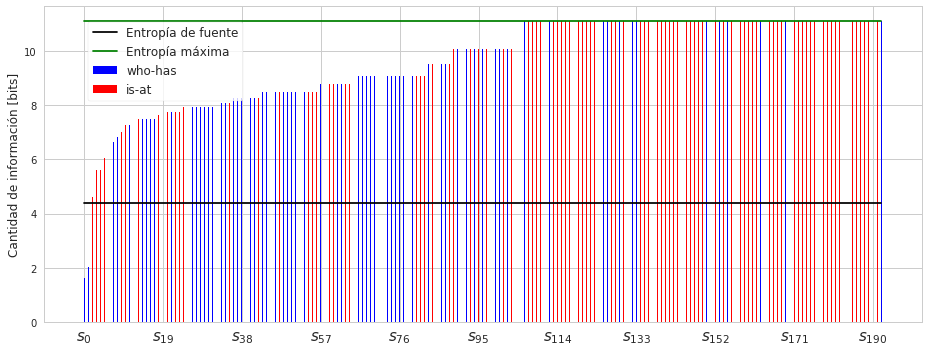

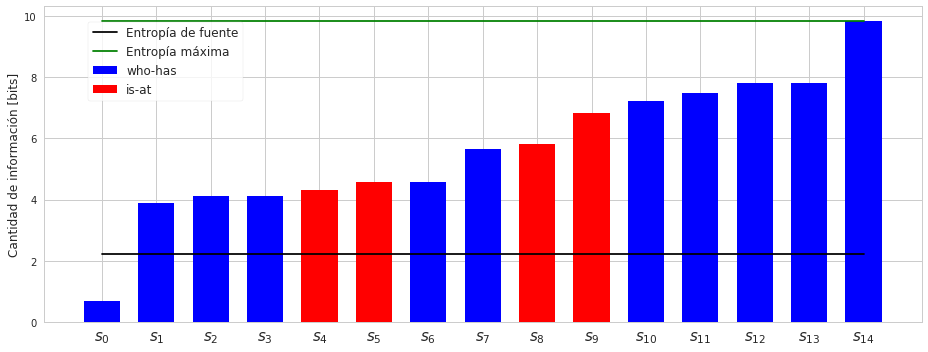

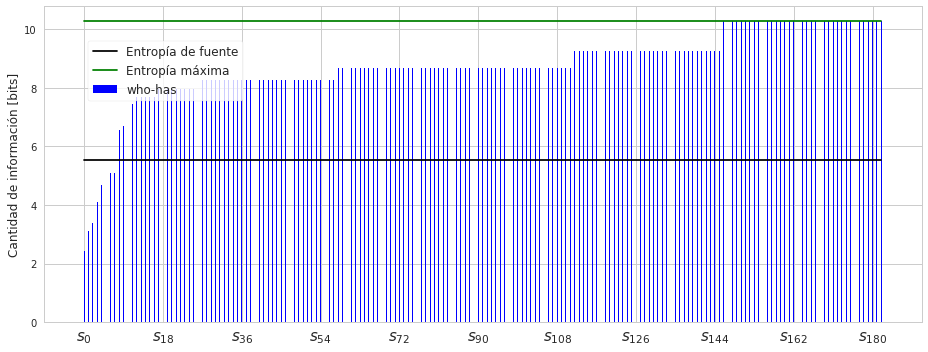

In [33]:
# Plots
plots_root = '../exp/plots/'
plots_root_informe = '../../tdc-tp1-informe/plots/'

for i in range(len(S2_list)):
    S2 = S2_list[i]
    plot_info_S2(S2)
    plt.savefig(plots_root+'infoS2_'+str(i+1)+'.pdf')
    plt.savefig(plots_root_informe+'infoS2_'+str(i+1)+'.pdf')

    #plt.show()


In [29]:
# Resumen info y proba

def resumen_proba(fuente):
    info_dic = OrderedDict(sorted(proba_por_simbolo(fuente).items(), key=lambda x: x[1]))
    symbols, vals = map(list, zip(*info_dic.items()))
    vals = np.array(vals)*100
    print 'el 1ro mayor proba:', symbols[len(symbols)-1]
    print 'el 2do mayor proba:', symbols[len(symbols)-2]
    print 'el 3ro mayor proba:', symbols[len(symbols)-3]
    print '# eltos: ', len(vals)
    print '* range:', np.amax(vals),'-' ,np.amin(vals)
    print '* .25:', np.percentile(vals,25)
    print '* .50:', np.percentile(vals,50)
    print '* .75:', np.percentile(vals,75)
    print '* .95:', np.percentile(vals,95)
    print '* std:', np.std(vals)
    print '* mean:', np.mean(vals)
    
    print '\n'

for i in range(len(S2_list)):
    S2 = S2_list[i]
    print(i+1)
    resumen_proba(S2)

    #plt.show()

1
el 1ro mayor proba: who-has
dst: 192.168.1.84
el 2do mayor proba: who-has
dst: 192.168.1.220
el 3ro mayor proba: who-has
dst: 192.168.1.1
# eltos:  255
* range: 22.030947775628626 - 0.01934235976789168
* .25: 0.03868471953578336
* .50: 0.058027079303675046
* .75: 0.058027079303675046
* .95: 1.2940038684719524
* std: 1.7784912690421855
* mean: 0.392156862745098


2
el 1ro mayor proba: who-has
dst: 172.19.32.1
el 2do mayor proba: who-has
dst: 172.19.96.1
el 3ro mayor proba: is-at
dst: 172.19.102.124
# eltos:  193
* range: 32.13793103448276 - 0.04597701149425287
* .25: 0.04597701149425287
* .50: 0.09195402298850575
* .75: 0.27586206896551724
* .95: 0.6988505747126406
* std: 2.8895496988581866
* mean: 0.5181347150259067


3
el 1ro mayor proba: who-has
dst: 192.168.0.107
el 2do mayor proba: who-has
dst: 192.168.0.112
el 3ro mayor proba: who-has
dst: 192.168.0.106
# eltos:  15
* range: 61.461794019933556 - 0.11074197120708748
* .25: 0.6090808416389812
* .50: 1.9933554817275747
* .75: 5.370

In [36]:
# de donde vienen los isAt de la red 2?

# Load pcaps
path = '../data/buenos/starbucks_juramento_monitor3_ARP.pcap'

# Create sources
S2_attrs = ['op','psrc']


packets = sniff(offline=path)
origenes = Counter()
for pkt in packets[ARP]:
    if pkt.op == ARP.is_at:
        origenes[pkt.psrc] += 1

Counter({'172.19.96.1': 388, '172.19.101.34': 8, '172.19.101.55': 7, '172.19.101.3': 5, '172.19.101.24': 4, '172.19.101.60': 3, '172.19.101.9': 3, '172.19.101.33': 3, '172.19.101.23': 2, '172.19.101.163': 2, '172.19.107.252': 2, '172.19.101.52': 2, '172.19.101.7': 2, '172.19.103.74': 1, '172.19.100.149': 1, '172.19.115.219': 1, '172.19.104.186': 1, '172.19.113.209': 1, '172.19.100.98': 1, '172.19.117.233': 1, '172.19.96.64': 1, '172.19.118.112': 1, '172.19.101.40': 1, '172.19.102.255': 1, '172.19.107.187': 1, '172.19.115.187': 1, '172.19.106.209': 1, '172.19.101.213': 1, '172.19.100.198': 1, '172.19.99.192': 1, '172.19.97.179': 1, '172.19.98.7': 1, '172.19.112.16': 1, '172.19.108.241': 1, '169.254.255.255': 1, '172.19.101.105': 1, '172.19.58.143': 1, '172.19.101.160': 1, '172.19.110.12': 1, '172.19.96.236': 1, '172.19.110.6': 1, '172.19.109.240': 1, '172.19.100.83': 1, '172.19.97.160': 1, '172.19.103.60': 1, '172.19.110.98': 1, '172.19.112.130': 1, '172.19.106.54': 1, '172.19.115.156':

['172.19.101.52', '172.19.101.7', '172.19.101.60', '172.19.101.9', '172.19.101.33', '172.19.101.24', '172.19.101.3', '172.19.101.55', '172.19.101.34', '172.19.96.1']
[2, 2, 3, 3, 3, 4, 5, 7, 8, 388]


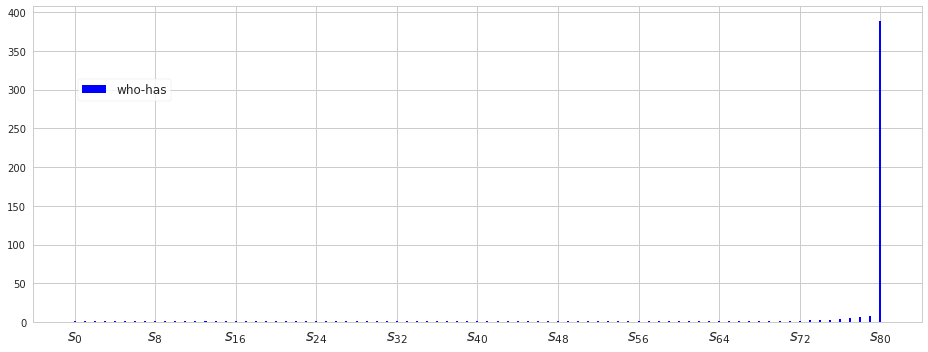

In [51]:
informacion = OrderedDict(sorted(origenes.items(), key=lambda x: x[1]))
index, values = map(list, zip(*informacion.items()))

fig, ax = plt.subplots(figsize=(13,5))
bar_size = max(10.0/len(index), 0.2)

ax.bar(range(len(index)), values, bar_size, color='b',label='who-has')



#ax.set_xlabel('Símbolos por orden de información, '+str(len(index))+' en total',labelpad=10,fontsize=12)
ax.legend(loc=(0.05,0.7),frameon=True,fontsize=12)

xlabelsloc = [x for x in range(0,len(index),len(index)/10)]
xlabels = ['$s_{'+str(x)+'}$' for x in xlabelsloc]
plt.xticks(xlabelsloc,xlabels,fontsize=15)
fig.tight_layout()

print(index[len(values)-10:])
print(values[len(values)-10:])